<a href="https://colab.research.google.com/github/Cdiezlop/ai4eng-udea-20252-cristian-diez/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 – Exploración de datos

## Proyecto AI4ENG UDEA 2025-2 – Pruebas Saber Pro Colombia

**Curso:** Modelos y Simulación de Sistemas  
**Programa:** Ingeniería de Sistemas – Universidad de Antioquia  
**Docente:** Raúl Ramos Pollán  

---

### Propósito del notebook
En esta primera entrega se realiza una exploración inicial del conjunto de datos de entrenamiento (`train.csv`) de la competencia de Kaggle.  
Se busca analizar la estructura general del dataset, los tipos de variables, valores faltantes y la distribución de la variable objetivo `RENDIMIENTO_GLOBAL`.

Además, se incluyen métodos para obtener los datos desde **Kaggle** (usando `kaggle.json`) o desde **Google Drive** si ya están almacenados allí.
---

## 1. Configuración del entorno

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Librerías principales
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)


Mounted at /content/drive


## 2. Obtener los datos desde Kaggle (opcional)
Si tienes el archivo `kaggle.json` subido a tu Drive, puedes usarlo para descargar los datos automáticamente.

In [18]:
# Ruta donde tienes guardado el kaggle.json dentro de tu Google Drive
ruta_kaggle_json = "/content/drive/MyDrive/1A - ING DE SISTEMAS 2025-1/MODELOS Y SIMULACION DE SISTEMAS/Proyecto kaggle/kaggle.json"

if os.path.exists(ruta_kaggle_json):
    os.makedirs('/root/.kaggle', exist_ok=True)
    !cp "$ruta_kaggle_json" /root/.kaggle/kaggle.json
    !chmod 600 /root/.kaggle/kaggle.json

    # Descargar datos desde Kaggle
    !kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia -p /content/data

    # Descomprimir archivos
    import zipfile
    zip_path = '/content/data/udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip'
    if os.path.exists(zip_path):
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall('/content/data')
        print("Archivos descargados y extraídos en /content/data/")
    else:
        print("No se encontró el archivo zip descargado.")
else:
    print("No se encontró kaggle.json. Puedes cargar el archivo train.csv desde tu Google Drive.")

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.26GB/s]
Archivos descargados y extraídos en /content/data/


## 3. Carga del dataset `train.csv`

In [20]:
# Posibles rutas del archivo train.csv
rutas_posibles = [
    '/content/data/train.csv',
    '/content/drive/MyDrive/1A-ING DE SISTEMAS 2025-1/MODELOS Y SIMULACION DE SISTEMAS/Proyecto kaggle/train.csv'
]

data = None
for ruta in rutas_posibles:
    if os.path.exists(ruta):
        print(f"Cargando datos desde: {ruta}")
        data = pd.read_csv(ruta)
        break

if data is None:
    raise FileNotFoundError("No se encontró el archivo train.csv en ninguna de las rutas esperadas.")

print("Dimensiones del dataset:", data.shape)
data.head()

Cargando datos desde: /content/data/train.csv
Dimensiones del dataset: (692500, 21)


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


## 4. Información general del dataset

In [21]:
print("Tipos de datos por columna:")
print(data.dtypes)

print("\nInformación general del dataset:")
data.info()

Tipos de datos por columna:
ID                               int64
PERIODO_ACADEMICO                int64
E_PRGM_ACADEMICO                object
E_PRGM_DEPARTAMENTO             object
E_VALORMATRICULAUNIVERSIDAD     object
E_HORASSEMANATRABAJA            object
F_ESTRATOVIVIENDA               object
F_TIENEINTERNET                 object
F_EDUCACIONPADRE                object
F_TIENELAVADORA                 object
F_TIENEAUTOMOVIL                object
E_PRIVADO_LIBERTAD              object
E_PAGOMATRICULAPROPIO           object
F_TIENECOMPUTADOR               object
F_TIENEINTERNET.1               object
F_EDUCACIONMADRE                object
RENDIMIENTO_GLOBAL              object
INDICADOR_1                    float64
INDICADOR_2                    float64
INDICADOR_3                    float64
INDICADOR_4                    float64
dtype: object

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 colu

## 5. Análisis de valores faltantes

In [22]:
faltantes = data.isnull().sum()
faltantes = faltantes[faltantes > 0].sort_values(ascending=False)

if len(faltantes) > 0:
    print(f"Se encontraron {len(faltantes)} columnas con valores faltantes:\n")
    print(faltantes)
else:
    print("No se encontraron valores faltantes en el dataset.")

Se encontraron 11 columnas con valores faltantes:

F_TIENEAUTOMOVIL               43623
F_TIENELAVADORA                39773
F_TIENECOMPUTADOR              38103
F_ESTRATOVIVIENDA              32137
E_HORASSEMANATRABAJA           30857
F_TIENEINTERNET.1              26629
F_TIENEINTERNET                26629
F_EDUCACIONMADRE               23664
F_EDUCACIONPADRE               23178
E_PAGOMATRICULAPROPIO           6498
E_VALORMATRICULAUNIVERSIDAD     6287
dtype: int64


## 6. Distribución de la variable objetivo

Distribución de la variable objetivo RENDIMIENTO_GLOBAL:
RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64


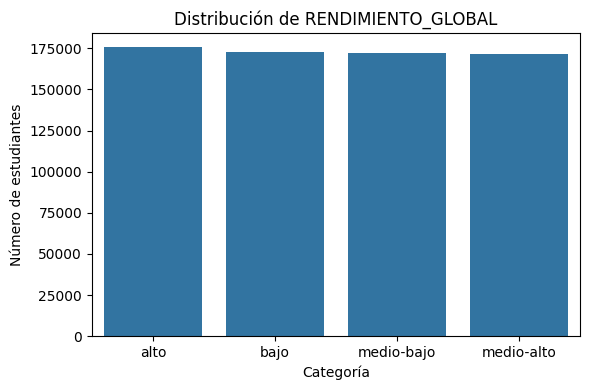

In [23]:
if 'RENDIMIENTO_GLOBAL' in data.columns:
    print("Distribución de la variable objetivo RENDIMIENTO_GLOBAL:")
    print(data['RENDIMIENTO_GLOBAL'].value_counts())

    plt.figure(figsize=(6,4))
    sns.countplot(x='RENDIMIENTO_GLOBAL', data=data, order=data['RENDIMIENTO_GLOBAL'].value_counts().index)
    plt.title('Distribución de RENDIMIENTO_GLOBAL')
    plt.xlabel('Categoría')
    plt.ylabel('Número de estudiantes')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No se encontró la columna 'RENDIMIENTO_GLOBAL'.")

## 7. Observaciones iniciales

### Análisis preliminar
- Se verificó la estructura general del dataset y sus dimensiones.  
- Se identificaron variables con valores faltantes que deberán ser tratadas en la siguiente fase.  
- Se revisó la variable objetivo `RENDIMIENTO_GLOBAL` y su distribución de clases.  
- Esta información servirá como base para definir estrategias de limpieza y modelado en la **Entrega 2**.

---
**Fin del notebook de exploración.**
